UFRJ/EQ, Agosto de 2018.

# Cálculo de equilíbrio líquido-vapor de substância pura com equação de estado cúbica.

# Introdução

sistema metano

# Metodologia

* programação P(T,V) usando SRK (Poling)
  * grid P versus grid V para dados T
  * desenhar isotermas
* programação V(P,T) usando roots
  * comparar calculos pontuais com as isotermas
* programação topliss
  * comparar resultados no gráfico
* programação Gresidual (Poling)
  * grid GL vs GV versus P para dado T
  * desenhar GL e GV versus V P para dado T
* programação Psat (bisect)
* grid psat versus grid T
* desenhar Psat versus T

In [34]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.optimize import bisect, fsolve
from numpy import roots

# Resultados e discussão

In [35]:
Tc= 190.6 #K
Pc= 45.99e5 #bar
omega= 0.012

## P eos

In [36]:
R=8.314

In [37]:
def P_soave(T,V):
    return R*T/(V-b) - f_a(T)/(V**2 + u*b*V + w*b**2)

In [38]:
# Soave
u=1
w=0

b=(0.08664*R*Tc)/Pc
ac=0.42748*R**2*Tc**2/Pc

def f_a(T):
    Tr=T/Tc
    return ac*(1+fw*(1-Tr**(.5)))**2

fw = 0.48 + 1.574*omega-0.176*omega**2

* grid

In [39]:
rangeT=np.array([.1,.25,.9,.95,1,2])*Tc
nT=len(rangeT)

nV=100
Vm= np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),nV)
P=[]
for T in rangeT:
    Pi=np.zeros(nV)
    for i in range(nV):
        Pi[i]=P_soave(T,Vm[i])
    P.append( Pi )
P

[array([  2.98782613e+08,  -1.45530843e+08,  -1.54621446e+08,
         -1.46225638e+08,  -1.34305104e+08,  -1.21841232e+08,
         -1.09784772e+08,  -9.84842976e+07,  -8.80614246e+07,
         -7.85394496e+07,  -6.98956415e+07,  -6.20851635e+07,
         -5.50529884e+07,  -4.87402043e+07,  -4.30874906e+07,
         -3.80370740e+07,  -3.35338263e+07,  -2.95258562e+07,
         -2.59647947e+07,  -2.28058880e+07,  -2.00079705e+07,
         -1.75333600e+07,  -1.53477053e+07,  -1.34198045e+07,
         -1.17214071e+07,  -1.02270093e+07,  -8.91364811e+06,
         -7.76069860e+06,  -6.74967842e+06,  -5.86406028e+06,
         -5.08909474e+06,  -4.41164361e+06,  -3.82002468e+06,
         -3.30386767e+06,  -2.85398146e+06,  -2.46223216e+06,
         -2.12143169e+06,  -1.82523632e+06,  -1.56805464e+06,
         -1.34496427e+06,  -1.15163682e+06,  -9.84270371e+05,
         -8.39528955e+05,  -7.14488359e+05,  -6.06587762e+05,
         -5.13586636e+05,  -4.33526420e+05,  -3.64696495e+05,
        

* plot

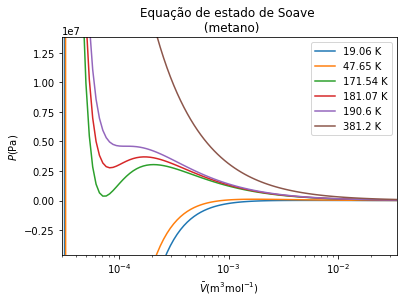

In [40]:
for i in range(nT):
    plt.semilogx(Vm,P[i],label=str(rangeT[i])+' K') #create a logarithm vs logarithm scale plot of pressure vs volume, using the function pressure in each value of the volume list
    plt.ylabel(r'$P (\mathrm{Pa})$') #create labels to be displayed in y axis of the plot
    plt.xlabel(r'$\bar{V} (\mathrm{m^{3}mol^{-1}})$') #use matplotlib's  mathtext to create special symbols in the x label
    plt.title('Equação de estado de Soave \n (metano)') #create a title for the figure
    plt.ylim(-Pc,Pc*3)#define max and min limits of the y axis only to the positive pressure range. remember that this plot is in logarithm scale and it does not accept negative values.
    plt.xlim(b,(R*Tc/Pc)*100) #define max and min limits of the x axis
plt.legend();

## V eos
$$Z^3-Z^2(1+B-uB)+Z(A+wB^2-uB-uB^2)-AB-wB^2-wB^3$$

In [41]:
def V_cubic(T,P):
    a=f_a(T)
    A=a*P/(R**2*T**2)
    B=b*P/(R*T)
    c3=1
    c2=-(1+B-u*B)
    c1=(A+w*B**2-u*B-u*B**2)
    c0=-A*B-w*B**2-w*B**3
    coeffs=[c3,c2,c1,c0]
#     print('coeffs:',coeffs)
    Z=roots(coeffs)
    nZ=len(Z)

    V=[ Zi*R*T/P for Zi in Z]

    goodV=[]    
    
    for i in range(nZ):
        if (abs(V[i].imag) < 1e-14) and (V[i] > b):
            goodV.append(V[i].real)
    
    vL=min(goodV)
    vV=max(goodV)
    zL=P*vL/(R*T)
    zV=P*vV/(R*T)
    return vL, vV, zL,zV

In [42]:
T0=273.15
P0=1.01325e5
print( V_cubic(T0,P0*10) )
print( V_cubic(T0,P0*100) )
print( V_cubic(T0,P0*1000) )
print( V_cubic(T0/2,P0) )
print( V_cubic(T0/4,P0) )
print( V_cubic(T0/8,P0) )
print( V_cubic(T0/8,P0*10) )
print( V_cubic(T0/8,P0*100) )

print( V_cubic(T0,P0/10) )
print( V_cubic(T0,P0/100) )
print( V_cubic(T0,P0/100) )
print( V_cubic(T0,P0/1000) )
print( V_cubic(T0,P0/10000) )

(0.0021878294226813496, 0.0021878294226813496, 0.97615514122665858, 0.97615514122665858)
(0.0001793647183114763, 0.0001793647183114763, 0.80028081768749459, 0.80028081768749459)
(4.4087869060909547e-05, 4.4087869060909547e-05, 1.967091200226661, 1.967091200226661)
(4.2973664625726785e-05, 0.010994695314128862, 0.0038347563321771022, 0.9811119866880682)
(3.3421231252545952e-05, 0.0049737773056450461, 0.0059646892714906941, 0.88767035270446326)
(3.1252964235590954e-05, 3.1252964235590954e-05, 0.011155437037593346, 0.011155437037593346)
(3.1246245748855888e-05, 3.1246245748855888e-05, 0.11153038940081829, 0.11153038940081829)
(3.1182654223466688e-05, 3.1182654223466688e-05, 1.113034057290436, 1.113034057290436)
(0.22407352023439525, 0.22407352023439525, 0.99976038589649241, 0.99976038589649241)
(2.241218536722366, 2.241218536722366, 0.99997603768978527, 0.99997603768978527)
(2.241218536722366, 2.241218536722366, 0.99997603768978527, 0.99997603768978527)
(22.412668721569116, 22.41266872156

* grid

In [43]:
rangeT=np.array([.1,.25,.90,.95,1,2])*Tc
nT=len(rangeT)

Vm_L=[]
Vm_V=[]
nP=100
gridP = np.logspace(-5,np.log10(Pc*3),nP)
# print(P)
for T in rangeT:
    Vmi_L=np.zeros(nP)
    Vmi_V=np.zeros(nP)
    for i in range(nP):
        Vmi_L[i],Vmi_V[i],*_ = V_cubic(T,gridP[i])
    Vm_L.append( Vmi_L )
    Vm_V.append( Vmi_V )

* plot

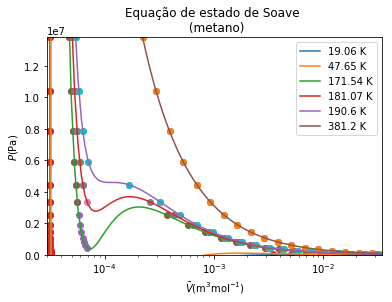

In [44]:
for i in range(nT):
    plt.semilogx(Vm,P[i],label=str(rangeT[i])+' K') #create a logarithm vs logarithm scale plot of pressure vs volume, using the function pressure in each value of the volume list
    plt.scatter(Vm_L[i],gridP)
    plt.scatter(Vm_V[i],gridP)
    plt.ylabel(r'$P (\mathrm{Pa})$') #create labels to be displayed in y axis of the plot
    plt.xlabel(r'$\bar{V} (\mathrm{m^{3}mol^{-1}})$') #use matplotlib's  mathtext to create special symbols in the x label
    plt.title('Equação de estado de Soave \n (metano)') #create a title for the figure
    plt.ylim(0,Pc*3)#define max and min limits of the y axis only to the positive pressure range. remember that this plot is in logarithm scale and it does not accept negative values.
    plt.xlim(b,(R*Tc/Pc)*100) #define max and min limits of the x axis
plt.legend();

# Topliss
> Topliss, Robert J., Dimitrios Dimitrelis, and John M. Prausnitz. 1988. “Computational Aspects of a Non-Cubic Equation of State for Phase-Equilibrium Calculations. Effect of Density-Dependent Mixing Rules.” Computers & Chemical Engineering 12 (5): 483–89. doi:10.1016/0098-1354(88)85067-1.

Sabendo que a pressão de saturação está na faixa de pressão para a qual há três raízes de volume, a região de busca pode ser definida pelo cálculo do mínimo e máximo locais da isoterma:

dado $T$, buscar $V^*$ tal que $\left(\frac{\partial P}{\partial V}\right)_T=0$

Filtram-se apenas os $V^*$ entre b e $\infty$



In [45]:
def symbolic_solve():
    import sympy as sym
    V,a,b,R,T,u,w = sym.symbols('V,a,b,R,T,u,w')
    P=-R*T/(V-b)**2+a/(V**2+u*b*V+w*b**2)**2*(2*V+u*b)
    print(P)
    
    Zero=-R*T*(V**2+u*b*V+w*b**2)**2+a*(V-b)**2*(2*V+u*b)
    print(Zero)
    
    expr=sym.expand(Zero)
    print(expr)
    
    col=sym.collect(expr,V)
    print(col)
    
    for i in range(4,-1,-1):
        print("c",i,"=", col.coeff(V,i))
        
symbolic_solve()

-R*T/(V - b)**2 + a*(2*V + b*u)/(V**2 + V*b*u + b**2*w)**2
-R*T*(V**2 + V*b*u + b**2*w)**2 + a*(V - b)**2*(2*V + b*u)
-R*T*V**4 - 2*R*T*V**3*b*u - R*T*V**2*b**2*u**2 - 2*R*T*V**2*b**2*w - 2*R*T*V*b**3*u*w - R*T*b**4*w**2 + 2*V**3*a + V**2*a*b*u - 4*V**2*a*b - 2*V*a*b**2*u + 2*V*a*b**2 + a*b**3*u
-R*T*V**4 - R*T*b**4*w**2 + V**3*(-2*R*T*b*u + 2*a) + V**2*(-R*T*b**2*u**2 - 2*R*T*b**2*w + a*b*u - 4*a*b) + V*(-2*R*T*b**3*u*w - 2*a*b**2*u + 2*a*b**2) + a*b**3*u
c 4 = -R*T
c 3 = -2*R*T*b*u + 2*a
c 2 = -R*T*b**2*u**2 - 2*R*T*b**2*w + a*b*u - 4*a*b
c 1 = -2*R*T*b**3*u*w - 2*a*b**2*u + 2*a*b**2
c 0 = -R*T*b**4*w**2 + a*b**3*u


In [46]:
#calculate each coeffcient of the polynomial-in-V representation of dP/dV=0
def Plimits(T):
    a=f_a(T)
    c4 = -R*T
    c3 = -2*R*T*b*u + 2*a
    c2 = -R*T*b**2*u**2 - 2*R*T*b**2*w + a*b*u - 4*a*b
    c1 = -2*R*T*b**3*u*w - 2*a*b**2*u + 2*a*b**2
    c0 = -R*T*b**4*w**2 + a*b**3*u
    
    #and use the method "roots" from package "numpy" to calculate the roots of this polynomial and assing the solutions to the variable plateaus as an array
    plateaus = np.roots([c4,c3,c2,c1,c0])
#    print("plateaus:", plateaus)

    #filter out values of plateu corresponding to non-physical volume (less than b or complex)
    plateaus = plateaus[ np.where( plateaus > b ) ] #using the numpy function 'where

#    print("plateaus:", plateaus)
    Vli = min(plateaus)
    Vvi = max(plateaus)

    #find the corresponding values of pressure for each filtered volume
    Psup = P_soave(T,Vvi)
    Psupi=Psup*.999

    Pinf = P_soave(T,Vli)

    #note that the algorithm cannot work with pressure less than or equal to zero, therefore fix minimium pressure to slightly above zero if it was negative

    if Pinf > 0:
        Pinfi = Pinf*1.001
    else:
        Pinfi = 0.000000001
        
    return [Vli,Vvi,Psupi,Pinfi]

[Vli,Vvi,Psupi,Pinfi]=Plimits(220)

print("Vli:",Vli)
print("Vvi:",Vvi)
print("Psupi:",Psupi)
print("Pinfi:",Pinfi)

Vli: (8.6222302904e-05-5.97156464401e-05j)
Vvi: (8.6222302904e-05+5.97156464401e-05j)
Psupi: (7843402.17463-2247076.45195j)
Pinfi: (7859104.68148+2251575.1035j)


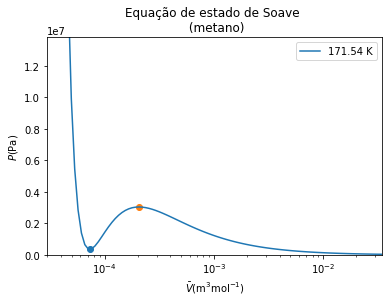

In [47]:
Vli,Vvi,Psupi,Pinfi=Plimits(rangeT[2])


for i in (2,):
    plt.semilogx(Vm,P[i],label=str(rangeT[i])+' K') #create a logarithm vs logarithm scale plot of pressure vs volume, using the function pressure in each value of the volume list
#     plt.scatter(Vm_L[i],gridP)
#     plt.scatter(Vm_V[i],gridP)
    plt.ylabel(r'$P (\mathrm{Pa})$') #create labels to be displayed in y axis of the plot
    plt.xlabel(r'$\bar{V} (\mathrm{m^{3}mol^{-1}})$') #use matplotlib's  mathtext to create special symbols in the x label
    plt.title('Equação de estado de Soave \n (metano)') #create a title for the figure
    plt.ylim(0,Pc*3)#define max and min limits of the y axis only to the positive pressure range. remember that this plot is in logarithm scale and it does not accept negative values.
    plt.xlim(b,(R*Tc/Pc)*100) #define max and min limits of the x axis
    plt.scatter(Vli,Pinfi)
    plt.scatter(Vvi,Psupi)
plt.legend();

## G residual/desvio
$$ A ...$$
$$ S ...$$
$$ \phi ...$$

In [48]:
def lnphi_pure(T,P,Z):
    a=f_a(T)
    A=a*P/(R**2*T**2)
    B=b*P/(R*T)
    T1=A/(B*(u**2-4*w)**.5)
    T2=(-1)
    T3=2*Z+B*(u+(u**2-4*w)**.5)
    T4=2*Z+B*(u-(u**2-4*w)**.5)
    lnphi=(Z-1)-np.log(Z-B)+T1*T2*np.log(T3/T4)
    return lnphi

* grid

In [49]:
T=rangeT[2]
Vli,Vvi,Psupi,Pinfi=Plimits(T)

nP=1000
lnphiL=np.zeros(nP)
lnphiV=np.zeros(nP)

gridP = np.linspace(Pinfi,Psupi,nP)
Vmi_L=np.zeros(nP)
Vmi_V=np.zeros(nP)
for i in range(1000):
    Vmi_L[i],Vmi_V[i],*_ = V_cubic(T,gridP[i])
    lnphiL[i] = lnphi_pure(T,gridP[i],gridP[i]*Vmi_L[i]/(R*T))
    lnphiV[i] = lnphi_pure(T,gridP[i],gridP[i]*Vmi_V[i]/(R*T))

* plot

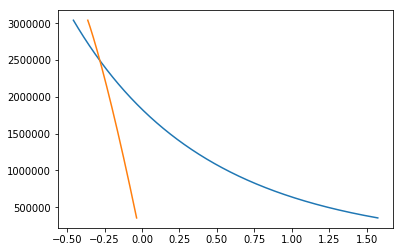

In [50]:
plt.plot(lnphiL,gridP)
plt.plot(lnphiV,gridP)

## Pressão de saturação

In [51]:
def Psat(T,P0a,P0b): #precisa guess tipo topliss
    def RES(P):
        vL,vV,zL,zV=V_cubic(T,P)
        lnphiL=lnphi_pure(T,P,zL)
        lnphiV=lnphi_pure(T,P,zV)
        return lnphiL-lnphiV
    Psati=bisect(RES,P0a,P0b)
    return Psati

def RES(P):
    vL,vV,zL,zV=V_cubic(T,P)
    lnphiL=lnphi_pure(T,P,zL)
    lnphiV=lnphi_pure(T,P,zV)
    return lnphiL-lnphiV

Vli,Vvi,Psupi,Pinfi=Plimits(rangeT[2])
Psat2=Psat(rangeT[2],Pinfi,Psupi)
Psat2

2492049.1428283956

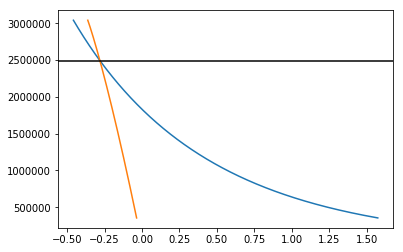

In [52]:
plt.plot(lnphiL,gridP)
plt.plot(lnphiV,gridP)
plt.axhline(Psat2,color='k')

* grid

In [53]:
nTP=1000
Tgrid=np.linspace(30,Tc,nTP)
Pgrid=np.zeros(nTP)
for i in range(nTP):
    Vli,Vvi,Psupi,Pinfi=Plimits(Tgrid[i])
    Pgrid[i]=Psat(Tgrid[i],Pinfi,Psupi)

* plot

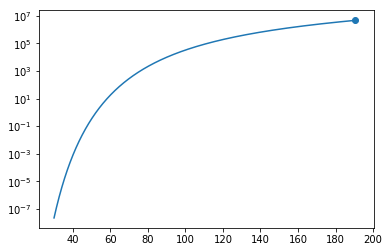

In [54]:
plt.plot(Tgrid,Pgrid)
plt.scatter(Tc,Pc)
plt.yscale('log')

# Conclusão

A solução do equilibrio liquido vapor por eos não é simples. há que se preocupar com solução trivial (phil=phiv | vl=vv; eos retornando uma unica raiz real; dificuldade de convergencia dos metodo numericos...)

